# Jack's Car Rental Problem
Jack manages two locations for a nationwide car rental company. Each day, some number of customers arrive at each location to rent cars. If Jack has a car available, he rents it out and is credited $10 by the national company. If he is out of cars at that location, then the business is lost. Cars become available for renting the day after they are returned. To help ensure that cars are available where they are needed, Jack can move them between the two locations overnight, at a cost of $2 per car moved.

We assume that the number of cars requested and returned at each location are Poisson random variables. <br>
The Poissan Distribution is given by
$$P(n|\lambda) = \frac{\lambda^n}{n!}e^{-\lambda}$$
where $\lambda$ is the expected number.

In [123]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
#Import the Poisson distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [125]:
#According to conditions set by question:
max_cars=20
max_move=5

request_1=3 
request_2=4
return_1=3
return_2=2

discount=0.9
rent=10
move=2

policy = np.zeros((max_cars + 1, max_cars + 1), dtype=int)
value = np.zeros((max_cars + 1, max_cars + 1))

states = [[i,j] for i in range (max_cars+1) for j in range(max_cars+1)]

In [126]:
#Storing probabilities calculated under the Poissan function in a memo
memo=dict()
def poisson_calculator(n,h):
    if (n,h) in memo:
        return memo[(n,h)]
    else:
        ans=poisson.pmf(n,h)
        memo[(n,h)]=ans
        return ans

In [127]:
def expected_reward(state,action,cap=10):
    rew=0
    car_l1=int(state[0]-action)
    car_l2=int(state[1]+action)
    for i in range(0,cap+1):
        for j in range(0,cap+1):
            rent1=min(i,car_l1)
            rent2=min(j,car_l2)
            prent1=poisson_calculator(i,request_1)
            prent2=poisson_calculator(j,request_2)

            rew+=((rent1+rent2)*rent-abs(action)*move)*prent1*prent2
            
            newcar_l1=car_l1-rent1
            newcar_l2=car_l2-rent2

            for p in range(0,cap+1):
                for q in range(0,cap+1):
                    pret1=poisson_calculator(p,return_1)
                    pret2=poisson_calculator(q,return_2)
                    
                    finalcar_1=min(max_cars,newcar_l1+p)
                    finalcar_2=min(max_cars,newcar_l2+q)
                    rew+=prent1*prent2*pret1*pret2*discount*value[finalcar_1,finalcar_2]
    return rew

In [128]:
epsilon = 1e-4
def policy_evaluation(policy, value):
    while(True):
        delta = 0
        for i in range(max_cars + 1):
            for j in range(max_cars + 1):
                old_value = value[i, j]
                
                state = [i, j]  
                value[i, j] = expected_reward(state, policy[i, j]) 
                delta = max(delta, abs(value[i, j] - old_value))
        if delta < epsilon:
            break

In [129]:
def policy_improvement(policy):
    stable=True
    for i in range(max_cars+1):
        for j in range(max_cars+1):
            old_action=policy[i,j]
            min_move=-min(min(j,5),min(20-i,5)) 
            max_move=min(min(i,5),min(20-j,5))
            max_rew=-np.inf
            best_action=old_action
            for action in range(min_move, max_move+1):
                rew=expected_reward([i,j],action)
                if rew>max_rew:
                    max_rew=rew
                    best_action=action
            policy[i,j]=best_action
            if(old_action!=policy[i,j]):
                stable=False
    return stable

In [130]:
iteration = 0
while True:
    global policy
    iteration += 1
    policy_evaluation(policy, value)
    if policy_improvement(policy):
        break

print("Iteration: ", iteration)
print("Policy converged!")

Iteration:  5
Policy converged!


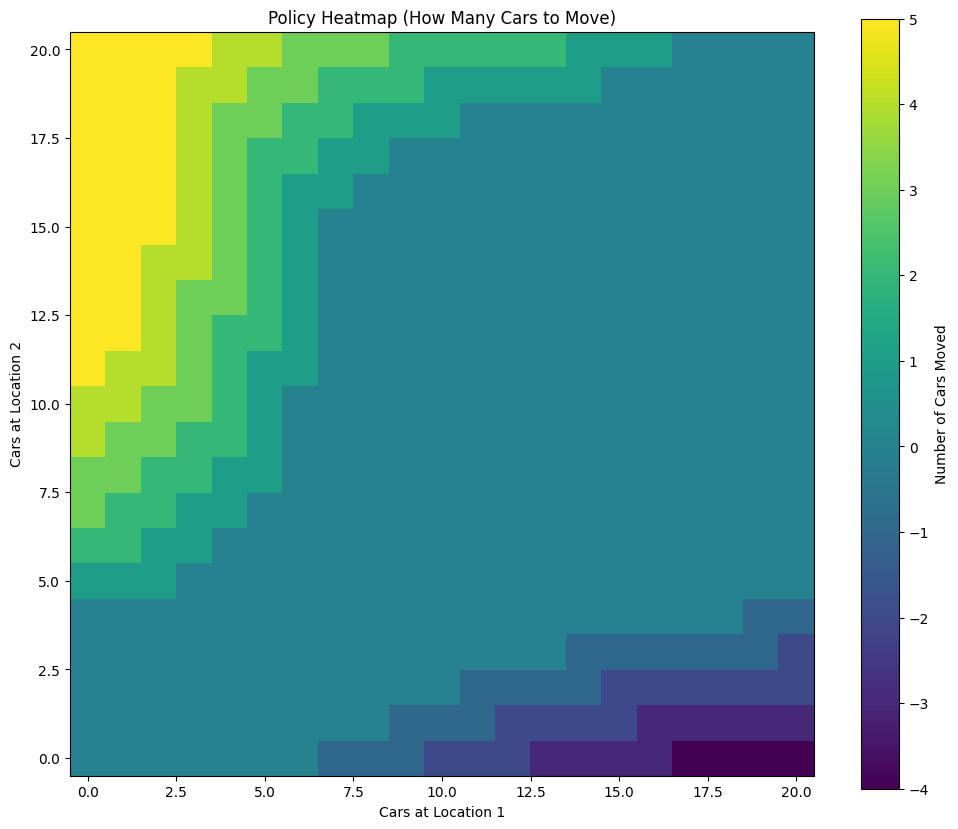

In [131]:
plt.figure(figsize=(12,10))
plt.imshow(policy, cmap='viridis', origin='lower')
plt.colorbar(label="Number of Cars Moved")
plt.xlabel("Cars at Location 1")
plt.ylabel("Cars at Location 2")
plt.title("Policy Heatmap (How Many Cars to Move)")
plt.show()